In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ..utils.utils import load_train_test

In [19]:
X_train, y_train, X_test, y_test = load_train_test()
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.730599,0.472859,0.139526,0.000000,0.020507,0.112183,0.162847,0.180941,0.192199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.152446,0.011377,0.308305,0.153584,0.096701,0.083049,0.086462,0.105802,0.071672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.975917,0.693234,0.241399,0.107225,0.098050,0.072248,0.062500,0.054472,0.054472,0.045872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.952505,0.587508,0.115810,0.072869,0.003904,0.025374,0.020169,0.020169,0.021470,0.014314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.994152,0.525666,0.248213,0.070825,0.152047,0.258609,0.315789,0.346979,0.352827,0.348928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


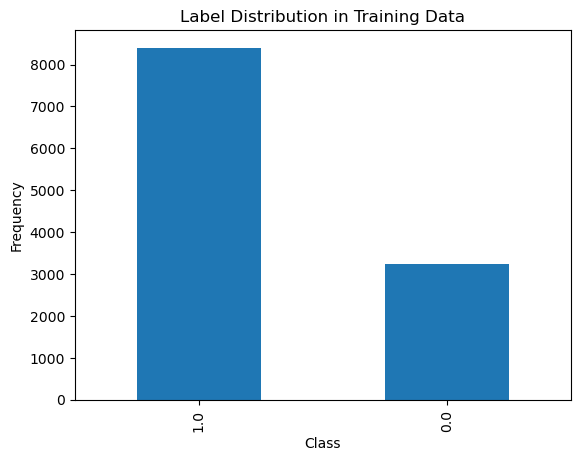

In [4]:
# Plot the distribution of the target variable
fig, ax = plt.subplots()
y_train.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Label Distribution in Training Data')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
plt.show()

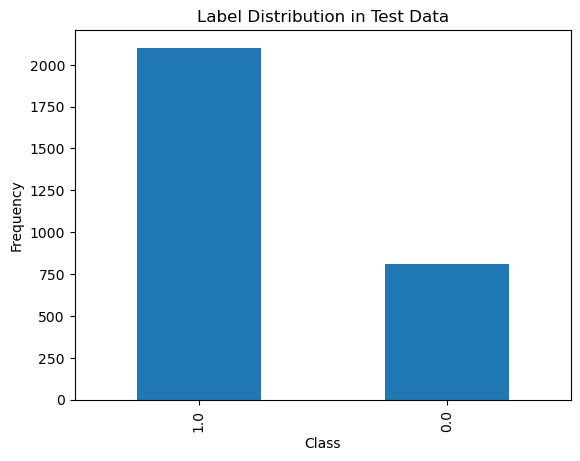

In [72]:
# Plot the distribution of the target variable
fig, ax = plt.subplots()
y_test.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Label Distribution in Test Data')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
plt.show()

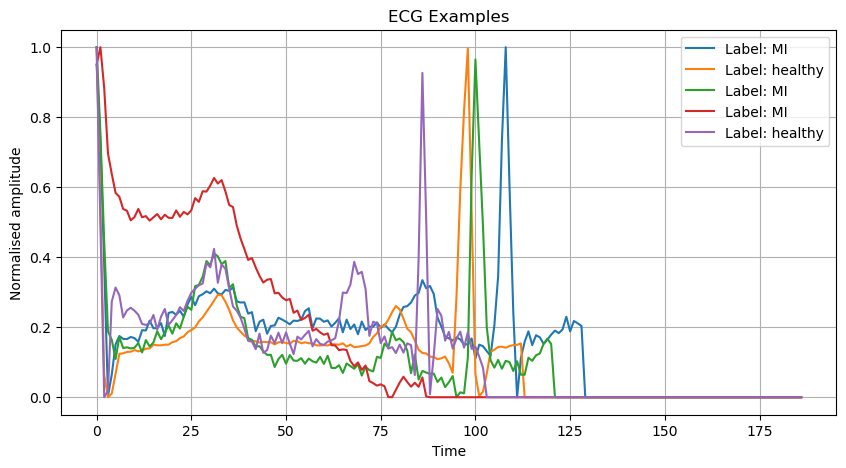

In [71]:
def plot_ecg_examples(X, Y, num_examples=5):
    # Randomly select some examples
    idx = np.random.choice(np.arange(len(X)), num_examples, replace=False)
    Y = Y.replace({0: 'healthy', 1: 'MI'})

    # Create a single figure and plot on it
    plt.figure(figsize=(10, 5))
    
    for i in idx:
        plt.plot(X.iloc[i, :], label=f"Label: {Y.iloc[i]}")
    
    plt.title(f"ECG Examples")
    plt.xlabel('Time')
    plt.ylabel('Normalised amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualise the first 5 ECG series
plot_ecg_examples(X_train, y_train, num_examples=5)

In [70]:
# Basic data info and missing values
print("Are there missing values in the training data?", X_train.isnull().sum().any())
print("Are there missing values in the test data?", X_test.isnull().sum().any(), "\n")

# Check if there are any negative values in the data
print("Are there negative values in the training data?", (X_train < 0).any().any())
print("Are there negative values in the test data?", (X_train < 0).any().any())

Are there missing values in the training data? False
Are there missing values in the test data? False 

Are there negative values in the training data? False
Are there negative values in the test data? False


In [12]:
# Basic data info and missing values
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


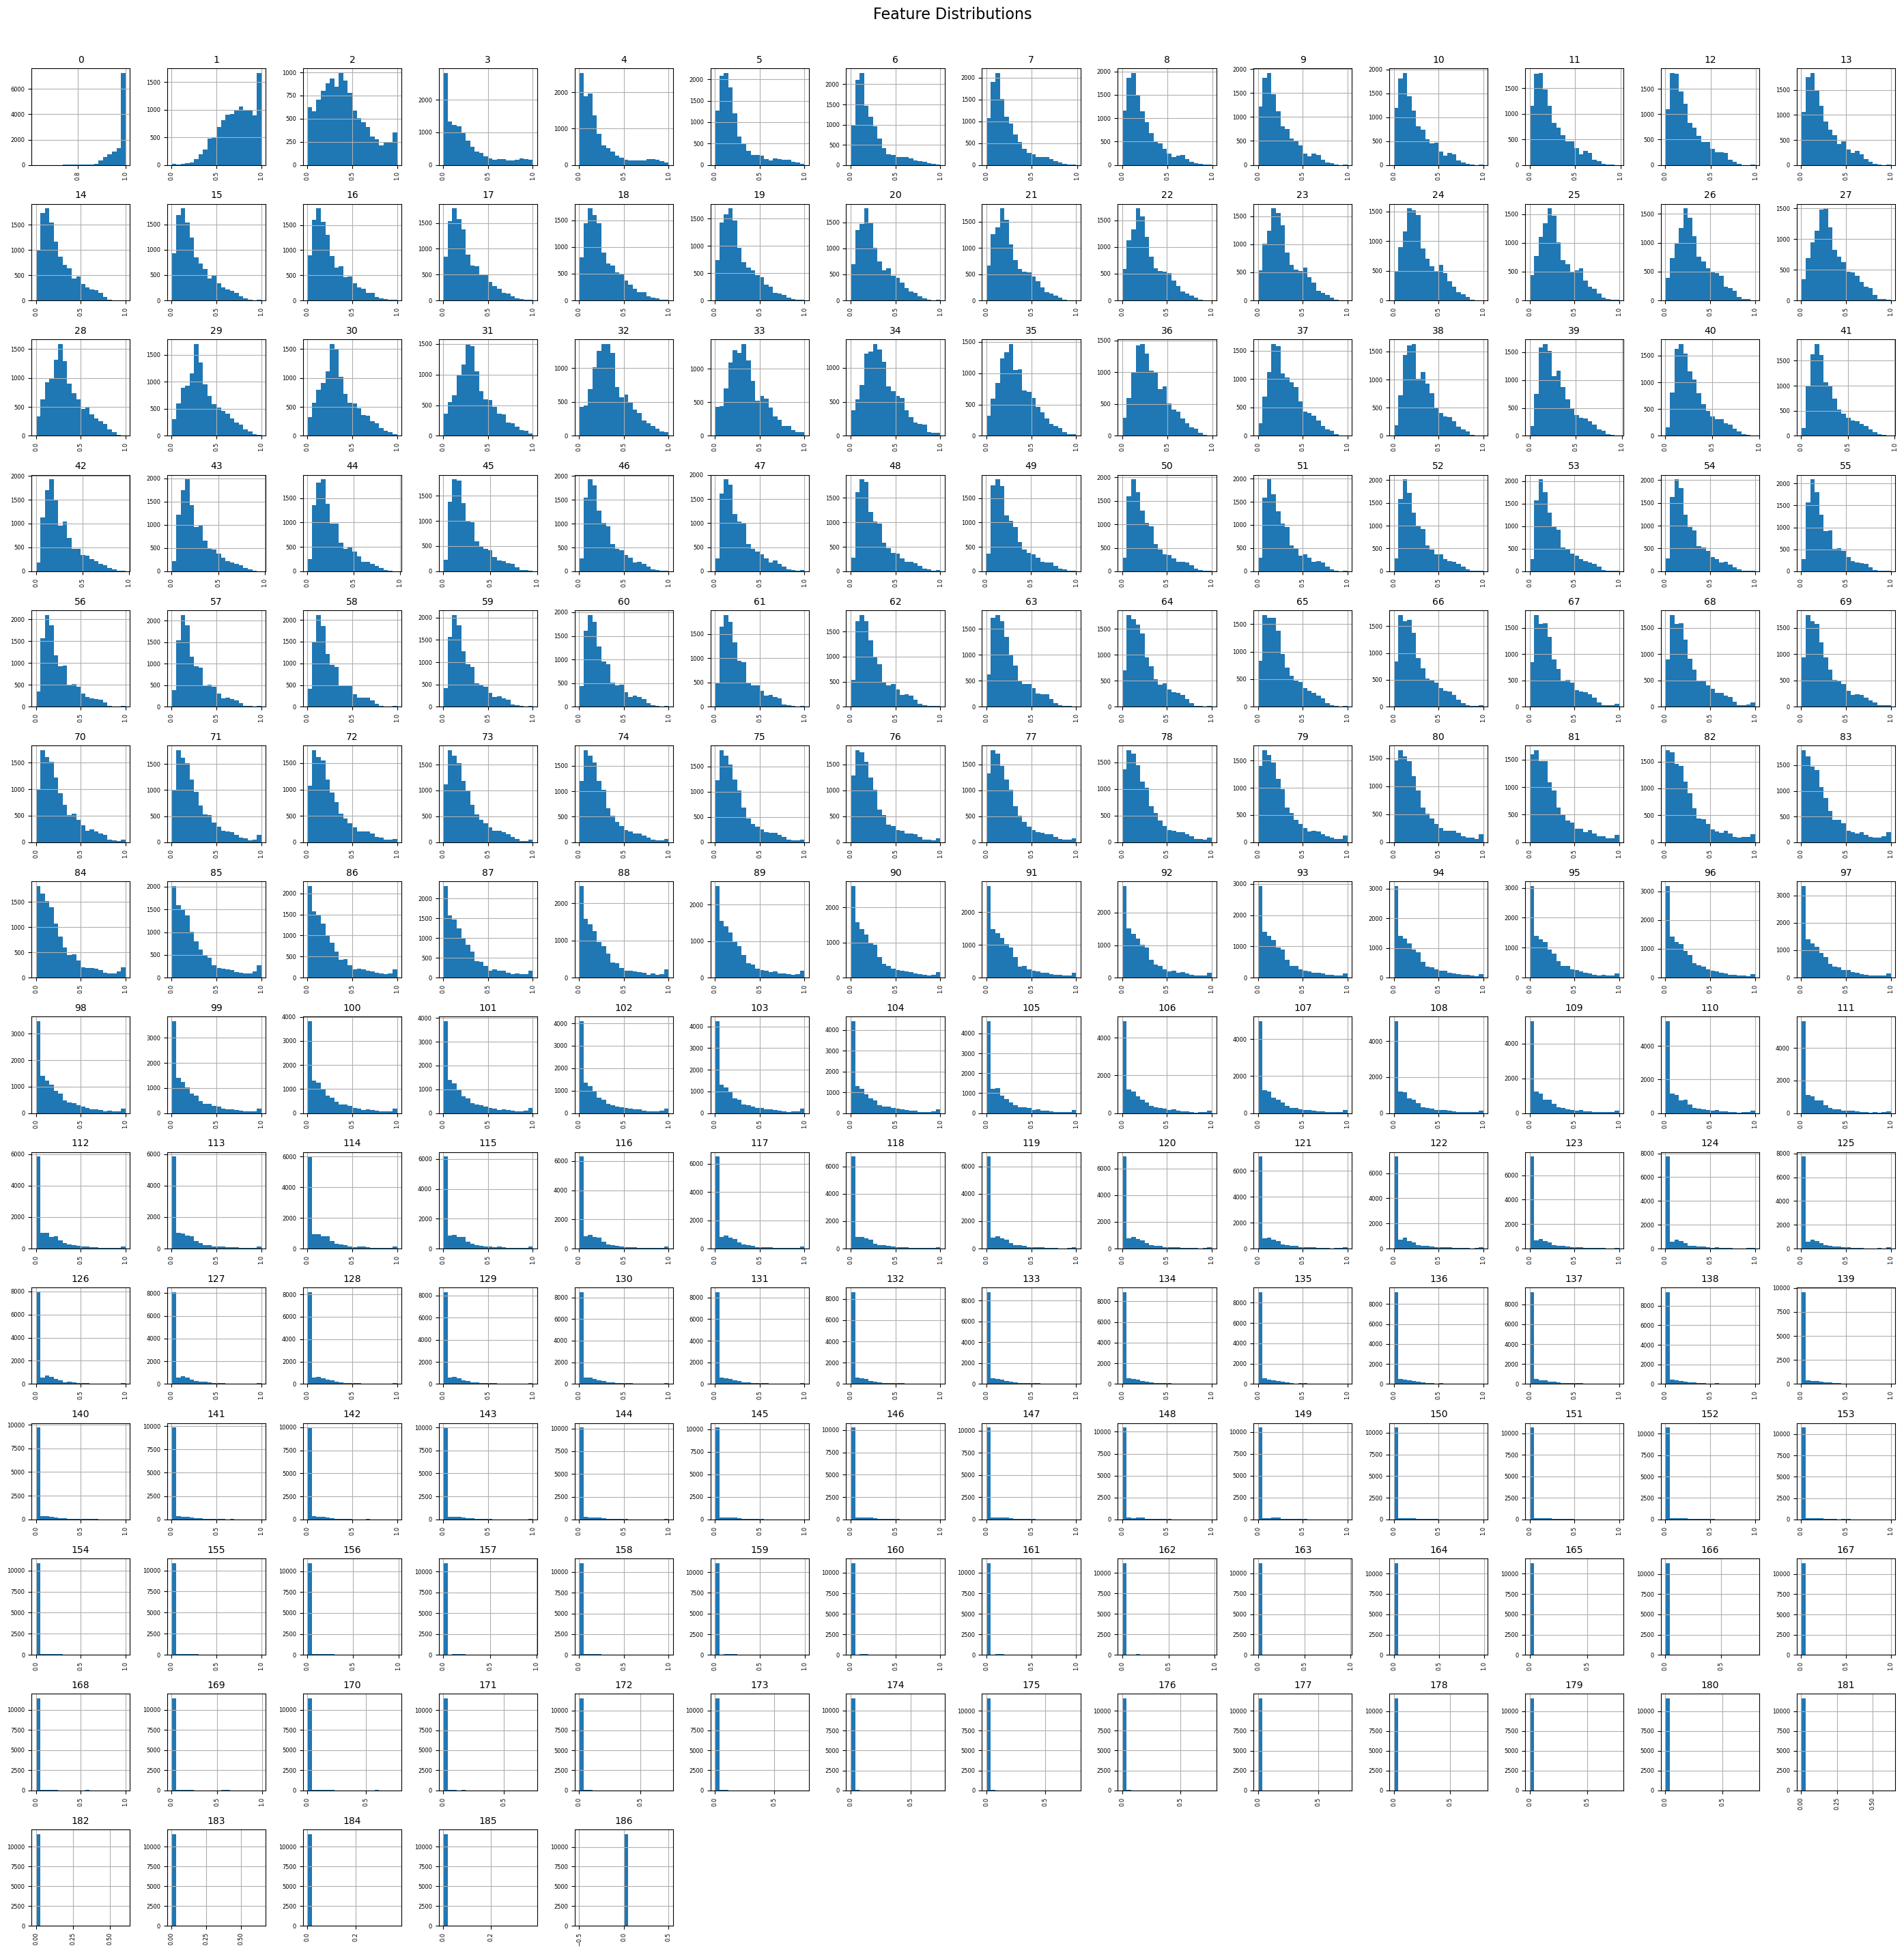

In [68]:
n_features = X_train.shape[1]
grid_size = int(np.ceil(np.sqrt(n_features)))

# Increase the overall figure size as needed
plt.figure(figsize=(grid_size * 2, grid_size * 2))

# Plot histograms in a grid and adjust as necessary
for i, column in enumerate(X_train.columns):
    plt.subplot(grid_size, grid_size, i + 1)
    X_train[column].hist(bins=20)
    plt.title(column, fontsize=10)
    plt.xticks(fontsize=6, rotation=90)
    plt.yticks(fontsize=6)

# Adjust layout
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)  # Adjust title size and position
plt.show()